In [1]:
%matplotlib widget


# Test 01

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

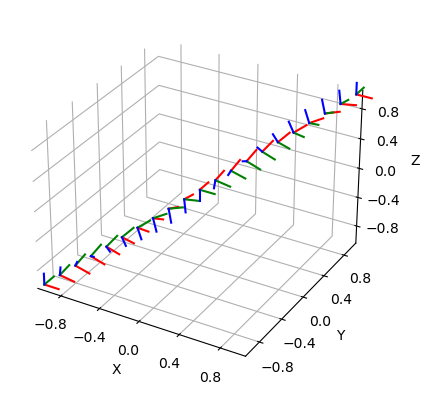

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from pytransform3d.rotations import (
    quaternion_integrate, matrix_from_quaternion, plot_basis)


angular_velocities = np.empty((21, 3))
angular_velocities[:, :] = np.array([np.sqrt(0.5), np.sqrt(0.5), 0.0])
angular_velocities *= np.pi

Q = quaternion_integrate(angular_velocities, dt=0.1)
ax = None
for t in range(len(Q)):
    R = matrix_from_quaternion(Q[t])
    p = 2 * (t / (len(Q) - 1) - 0.5) * np.ones(3)
    print(type(R))
    print(type(p))
    ax = plot_basis(ax=ax, s=0.15, R=R, p=p)
plt.show()

In [16]:
R

array([[ 1.00000000e+00,  9.62964972e-33,  1.38777878e-16],
       [ 9.62964972e-33,  1.00000000e+00, -1.38777878e-16],
       [-1.38777878e-16,  1.38777878e-16,  1.00000000e+00]])

In [17]:
p

array([1., 1., 1.])

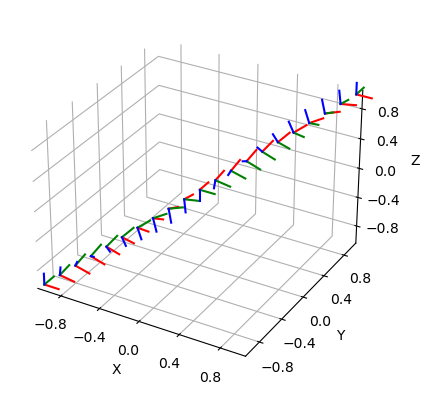

In [38]:
import numpy as np
from scipy.spatial.transform import Rotation as R
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pytransform3d.rotations import (
    quaternion_integrate, matrix_from_quaternion, plot_basis)
matrix_from_quaternion

angular_velocities = np.empty((21, 3))
angular_velocities[:, :] = np.array([np.sqrt(0.5), np.sqrt(0.5), 0.0])
angular_velocities *= np.pi

Q = quaternion_integrate(angular_velocities, dt=0.1)
# print(Q)
ax = None
for t in range(len(Q)):
    Rot = matrix_from_quaternion(Q[t])
    p = 2 * (t / (len(Q) - 1) - 0.5) * np.ones(3)
#     print(p)
    ax = plot_basis(ax=ax, s=0.15, R=Rot, p=p)
plt.show()

In [40]:
print(trans)

[[2.481996, 3.331899, 1.356713], [2.602291, 3.008327, 1.301364], [2.65583, 2.981598, 1.368648], [2.597897, 3.329533, 1.418409], [2.621844, 3.193201, 1.300204]]


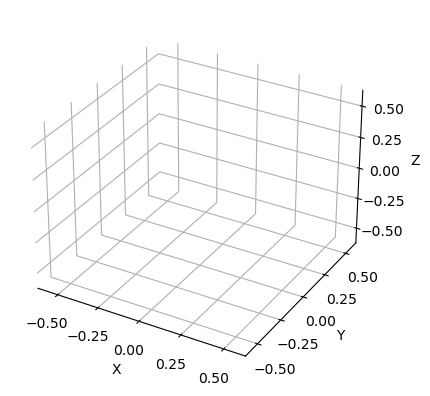

In [47]:
import numpy as np
from scipy.spatial.transform import Rotation as R
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pytransform3d.rotations import (
    quaternion_integrate, matrix_from_quaternion, plot_basis)
matrix_from_quaternion

angular_velocities = np.empty((21, 3))
angular_velocities[:, :] = np.array([np.sqrt(0.5), np.sqrt(0.5), 0.0])
angular_velocities *= np.pi

Q = quaternion_integrate(angular_velocities, dt=0.1)
# print(Q)
ax = None
for i ,j in zip(rotation, trans):
    Rot = i
    p = j 
    print
    ax = plot_basis(s=0.1, R=i, p=p, ax_s=0.6)
    
plt.show()

In [3]:
with open('/home/latai/Downloads/data/test_01/ARCore_sensor_pose.txt') as f:
    lines = f.readlines()

In [4]:
lines[1].split()

['257318484244692',
 '-0.157415',
 '0.009155',
 '0.021936',
 '0.987246',
 '-0.028210',
 '-0.001686',
 '0.252041']

In [5]:
list(map(float, lines[1].split()))

[257318484244692.0,
 -0.157415,
 0.009155,
 0.021936,
 0.987246,
 -0.02821,
 -0.001686,
 0.252041]

In [5]:
import os
items = os.listdir("/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/data/")

newlist = []
for names in items:
    if names.endswith(".txt"):
        newlist.append("/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/data/"+names)
print (newlist)

['/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/data/60.txt', '/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/data/20.txt', '/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/data/0.txt', '/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/data/80.txt', '/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/data/40.txt']


In [6]:
with open(newlist[0]) as f:
    lines = f.readlines()

In [21]:
for i in lines:
    print(type(i))
    print(list(map(float, i.split()))[])
    break

<class 'str'>
[-0.862966, 0.256698, -0.435196, 2.481996]


In [31]:

rotation = []
trans = []

for i in newlist:
    with open(i) as f:
        lines = f.readlines()
    
    temp_rota = []
    temp_trans = []
    
    for i in lines[:-1]:
        temp_rota.append(list(map(float, i.split()))[:-1])
        print(list(map(float, i.split()))[-1])
        temp_trans.append(list(map(float, i.split()))[-1])
    rotation.append(temp_rota)
    trans.append(temp_trans)

2.481996
3.331899
1.356713
2.602291
3.008327
1.301364
2.65583
2.981598
1.368648
2.597897
3.329533
1.418409
2.621844
3.193201
1.300204


In [29]:
rotation

[[[-0.862966, 0.256698, -0.435196],
  [0.505246, 0.431696, -0.747238],
  [-0.003942, -0.864722, -0.502235]],
 [[-0.931163, 0.243991, -0.270933],
  [0.361935, 0.528809, -0.767701],
  [-0.04404, -0.812914, -0.580716]],
 [[-0.955421, 0.119616, -0.269932],
  [0.295248, 0.388339, -0.872939],
  [0.000408, -0.91372, -0.406343]],
 [[-0.895604, 0.170329, -0.410951],
  [0.444819, 0.354142, -0.82263],
  [0.005417, -0.919549, -0.392937]],
 [[-0.888398, 0.276524, -0.366446],
  [0.458458, 0.493096, -0.739373],
  [-0.023761, -0.824858, -0.564841]]]

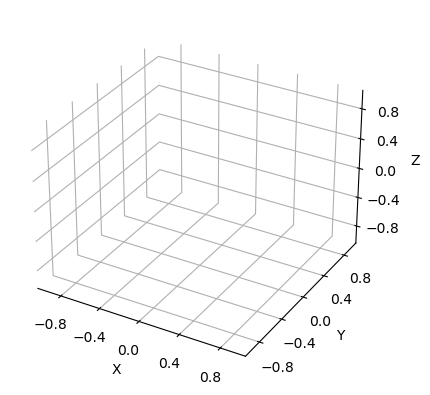

In [37]:
ax = None
for i ,j in zip(rotation, trans):
    ax = plot_basis(ax=ax, R=i, p=j)
plt.show()

In [33]:
np.asarray(rotation[0])
np.asarray(trans[0])

array([2.481996, 3.331899, 1.356713])

In [ ]:
figure(figsize=(10, 10), dpi=100)
ax = None

for i ,j in zip(rotation, trans):
    ax = plot_basis(ax=ax, s=0.1, R=i, p=j, ax_s=0.6)

ax.plot(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='y')
plt.show()
    
# for t in range(len(quat_values_np)):
#     R = matrix_from_quaternion(quat_values_np[t])
    
#     ax = plot_basis(ax=ax, s=0.1, R=R, p=trans_values_np[t], ax_s=0.6)
# ax.plot(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='y')
# plt.show()

In [ ]:
figure(figsize=(10, 10), dpi=100)
ax = None
for t in range(len(quat_values_np)):
    R = matrix_from_quaternion(quat_values_np[t])
    
    ax = plot_basis(ax=ax, s=0.1, R=R, p=trans_values_np[t], ax_s=0.6)
ax.plot(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='y')
plt.show()

In [6]:
quat_values = []
trans_values = []

for i in lines[1:]:
    quat_values.append(list(map(float, i.split()))[1:5])
    trans_values.append(list(map(float, i.split()))[5:])

In [7]:
quat_values_np = np.array(quat_values)
trans_values_np = np.array(trans_values)

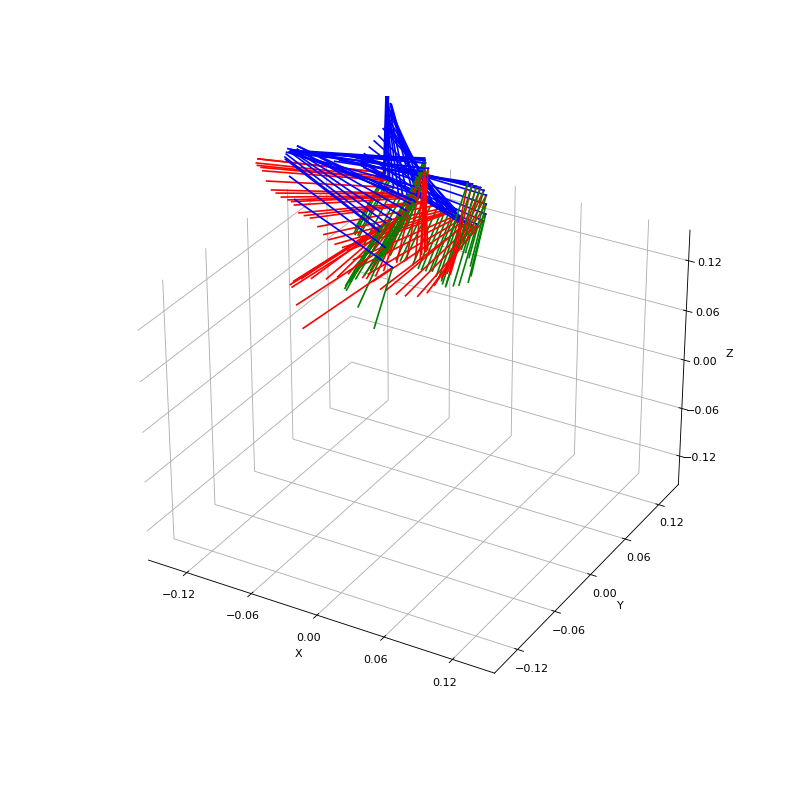

In [8]:


figure(figsize=(10, 10), dpi=80)
ax = None
for t in range(len(quat_values_np)):
    R = matrix_from_quaternion(quat_values_np[t])
    
    ax = plot_basis(ax=ax, s=0.1, R=R, p=trans_values_np[t], ax_s=0.15)
    
plt.show()

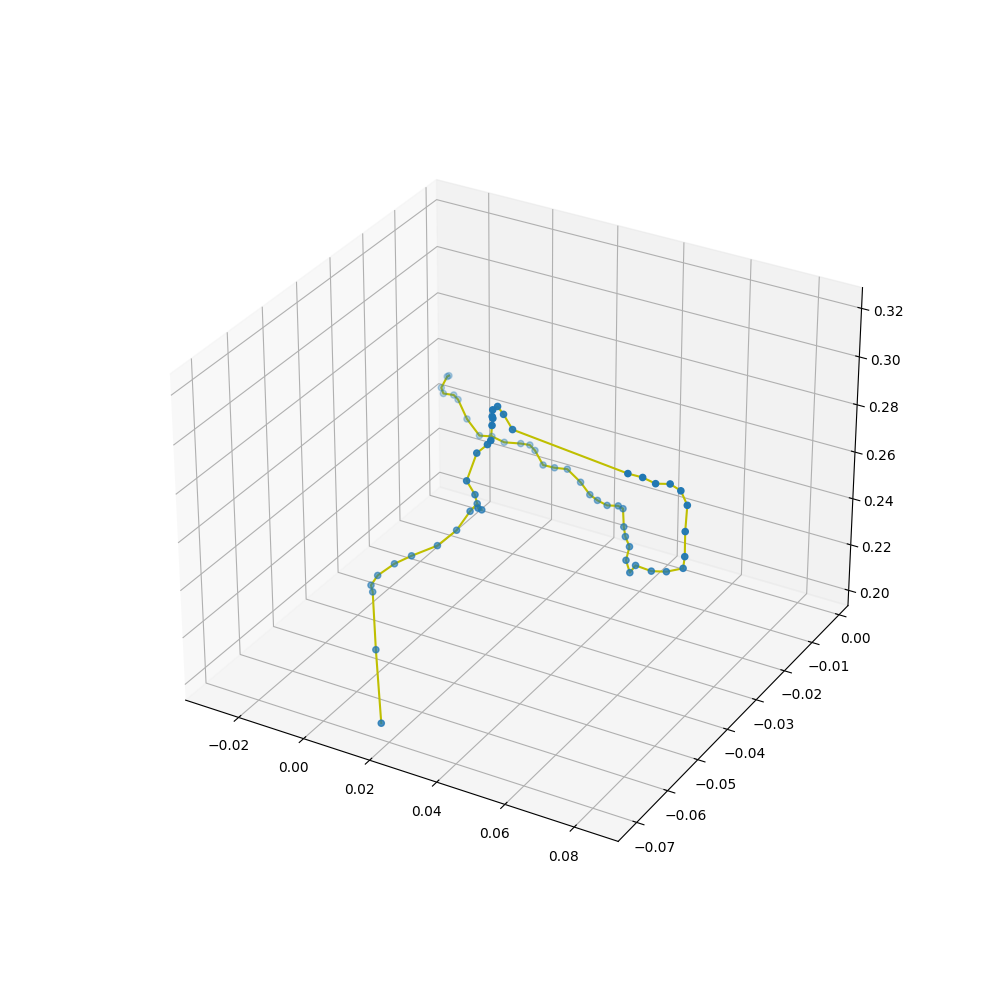

In [9]:
import matplotlib.pyplot as plt
import random

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

sequence_containing_x_vals =  [x[0] for x in trans_values_np]
sequence_containing_y_vals =  [x[1] for x in trans_values_np]
sequence_containing_z_vals =  [x[2] for x in trans_values_np]


ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
ax.plot(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='y')

plt.show()

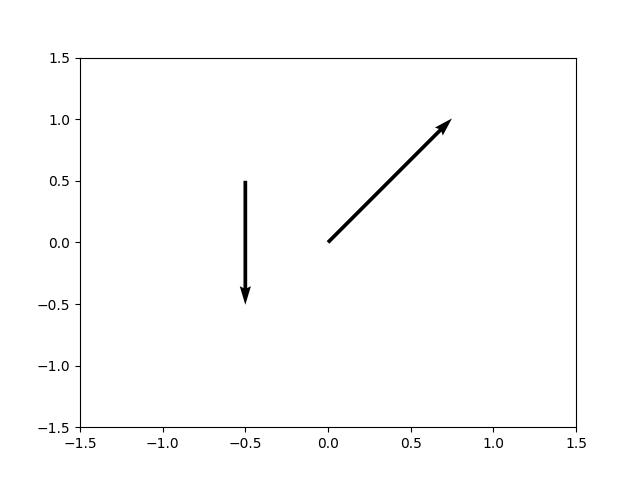

In [10]:

fig, ax = plt.subplots()

x_pos = [0, -0.5]
y_pos = [0, 0.5]
x_direct = [1, 0]
y_direct = [1, -1]

ax.quiver(x_pos,y_pos,x_direct,y_direct, scale=4)
ax.axis([-1.5,1.5,-1.5,1.5])

plt.show()

In [11]:
x_x = []
y_x = []
z_x = []

x_y = []
y_y = []
z_y = []

x_z = []
y_z = []
z_z = []

for i in quat_values_np:
    r = R.from_quat(i)
    x_x.append(r.as_matrix()[:,0][0])
    y_x.append(r.as_matrix()[:,0][1])
    z_x.append(r.as_matrix()[:,0][2])
    x_y.append(r.as_matrix()[:,1][0])
    y_y.append(r.as_matrix()[:,1][1])
    z_y.append(r.as_matrix()[:,1][2])
    x_z.append(r.as_matrix()[:,2][0])
    y_z.append(r.as_matrix()[:,2][1])
    z_z.append(r.as_matrix()[:,2][2])

AttributeError: 'numpy.ndarray' object has no attribute 'from_quat'

In [12]:
values1 = []
values2 = []
values3 = []

for i,j,k,a,b,c in zip(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, x_x, y_x, z_x):
    values1.append([i,j,k,a,b,c])

for i,j,k,a,b,c in zip(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, x_y, y_y, z_y):
    values2.append([i,j,k,a,b,c])

for i,j,k,a,b,c in zip(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, x_z, y_z, z_z):
    values3.append([i,j,k,a,b,c])

In [13]:
soa1 = np.array(values1)
X_x, Y_x, Z_x, U_x, V_x, W_x = zip(*soa1)

soa2 = np.array(values2)
X_y, Y_y, Z_y, U_y, V_y, W_y = zip(*soa2)

soa3 = np.array(values3)
X_z, Y_z, Z_z, U_z, V_z, W_z = zip(*soa3)



# Color by azimuthal angle
c = np.arctan2(U_z, V_z)
# Flatten and normalize
c = (c.ravel() - c.min()) / c.ptp()
# Repeat for each body line and two head lines
c = np.concatenate((c, np.repeat(c, 2)))
# Colormap
c = plt.cm.hsv(c)

fig = plt.figure(figsize=(10, 10))
# ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X_x+X_y+X_z, Y_x+Y_y+Y_z, Z_x+Z_y+Z_z, U_x+U_y+U_z, V_x+V_y+V_z, W_x+W_y+W_z, length=0.006, normalize=True)
# ax.quiver(X_y, Y_y, Z_y, U_y, V_y, W_y, length=0.006, normalize=True, cmap='Reds')
# ax.quiver(X_z, Y_z, Z_z, U_z, V_z, W_z, length=0.006, normalize=True, cmap='Reds')
ax.plot(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='y')
plt.show()

ValueError: not enough values to unpack (expected 6, got 0)

# Test - 02

In [14]:
with open('/home/latai/Downloads/data/test_02/ARCore_sensor_pose.txt') as f:
    lines = f.readlines()

In [15]:
quat_values = []
trans_values = []

for i in lines[1:]:
    quat_values.append(list(map(float, i.split()))[1:5])
    trans_values.append(list(map(float, i.split()))[5:])

In [16]:
quat_values_np = np.array(quat_values)
trans_values_np = np.array(trans_values)

In [17]:
sequence_containing_x_vals =  [x[0] for x in trans_values_np]
sequence_containing_y_vals =  [x[1] for x in trans_values_np]
sequence_containing_z_vals =  [x[2] for x in trans_values_np]

In [18]:
x_x = []
y_x = []
z_x = []

x_y = []
y_y = []
z_y = []

x_z = []
y_z = []
z_z = []

for i in quat_values_np:
    r = R.from_quat(i)
    x_x.append(r.as_matrix()[:,0][0])
    y_x.append(r.as_matrix()[:,0][1])
    z_x.append(r.as_matrix()[:,0][2])
    x_y.append(r.as_matrix()[:,1][0])
    y_y.append(r.as_matrix()[:,1][1])
    z_y.append(r.as_matrix()[:,1][2])
    x_z.append(r.as_matrix()[:,2][0])
    y_z.append(r.as_matrix()[:,2][1])
    z_z.append(r.as_matrix()[:,2][2])

AttributeError: 'numpy.ndarray' object has no attribute 'from_quat'

In [19]:
values1 = []
values2 = []
values3 = []

for i,j,k,a,b,c in zip(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, x_x, y_x, z_x):
    values1.append([i,j,k,a,b,c])

for i,j,k,a,b,c in zip(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, x_y, y_y, z_y):
    values2.append([i,j,k,a,b,c])

for i,j,k,a,b,c in zip(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, x_z, y_z, z_z):
    values3.append([i,j,k,a,b,c])

In [20]:
soa1 = np.array(values1)
X_x, Y_x, Z_x, U_x, V_x, W_x = zip(*soa1)

soa2 = np.array(values2)
X_y, Y_y, Z_y, U_y, V_y, W_y = zip(*soa2)

soa3 = np.array(values3)
X_z, Y_z, Z_z, U_z, V_z, W_z = zip(*soa3)



# Color by azimuthal angle
c = np.arctan2(U_z, V_z)
# Flatten and normalize
c = (c.ravel() - c.min()) / c.ptp()
# Repeat for each body line and two head lines
c = np.concatenate((c, np.repeat(c, 2)))
# Colormap
c = plt.cm.hsv(c)

fig = plt.figure(figsize=(10, 10),dpi=100)
# ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X_x+X_y+X_z, Y_x+Y_y+Y_z, Z_x+Z_y+Z_z, U_x+U_y+U_z, V_x+V_y+V_z, W_x+W_y+W_z, length=0.02, normalize=True)
# ax.quiver(X_y, Y_y, Z_y, U_y, V_y, W_y, length=0.006, normalize=True, cmap='Reds')
# ax.quiver(X_z, Y_z, Z_z, U_z, V_z, W_z, length=0.006, normalize=True, cmap='Reds')
ax.plot(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='y')
plt.show()

ValueError: not enough values to unpack (expected 6, got 0)

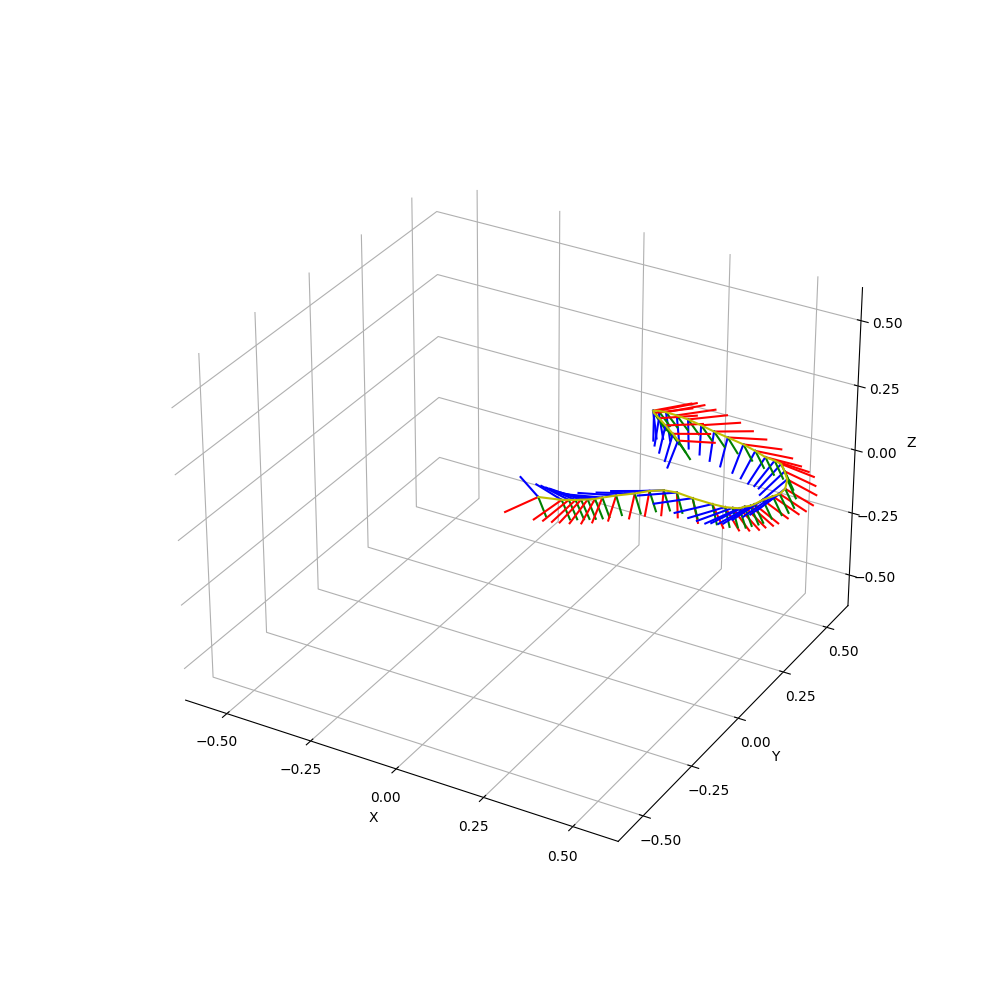

In [21]:
figure(figsize=(10, 10), dpi=100)
ax = None
for t in range(len(quat_values_np)):
    R = matrix_from_quaternion(quat_values_np[t])
    
    ax = plot_basis(ax=ax, s=0.1, R=R, p=trans_values_np[t], ax_s=0.6)
ax.plot(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='y')
plt.show()

In [59]:
pose = "/home/manojkl/Documents/MT/ManojKolpeThesis/src/segmentation/dataset/raw_to_color/pose2/"

In [60]:
import re
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

In [61]:
r_values = []
trans_values = []

for i in sorted_alphanumeric(os.listdir(pose)):
#     print(pose+i)
    with open(pose+i) as f:
        lines = f.readlines()
#     print(lines)
#     print(lines[0].split(' '))
    
    r_temp = []
    trans_temp = []
    
    for j in range(len(lines)-1):
        r_temp_2 = []
        for i in range(len(lines[j].split(' '))-1):
#             print(lines[j].split(' ')[i])
            r_temp_2.append(float(lines[j].split(' ')[i]))
        r_temp.append(r_temp_2)
#         print("------")
#         print(lines[j].split(' ')[-1])
        trans_temp.append(float(lines[j].split(' ')[-1]))
    r_temp = np.array(r_temp)
#     print(r_temp)
#     print(trans_temp)
    r_values.append(r_temp)
    trans_values.append(trans_temp)

In [62]:
trans_values_np = np.array(trans_values)
sequence_containing_x_vals =  [x[0] for x in trans_values_np]
sequence_containing_y_vals =  [x[1] for x in trans_values_np]
sequence_containing_z_vals =  [x[2] for x in trans_values_np]

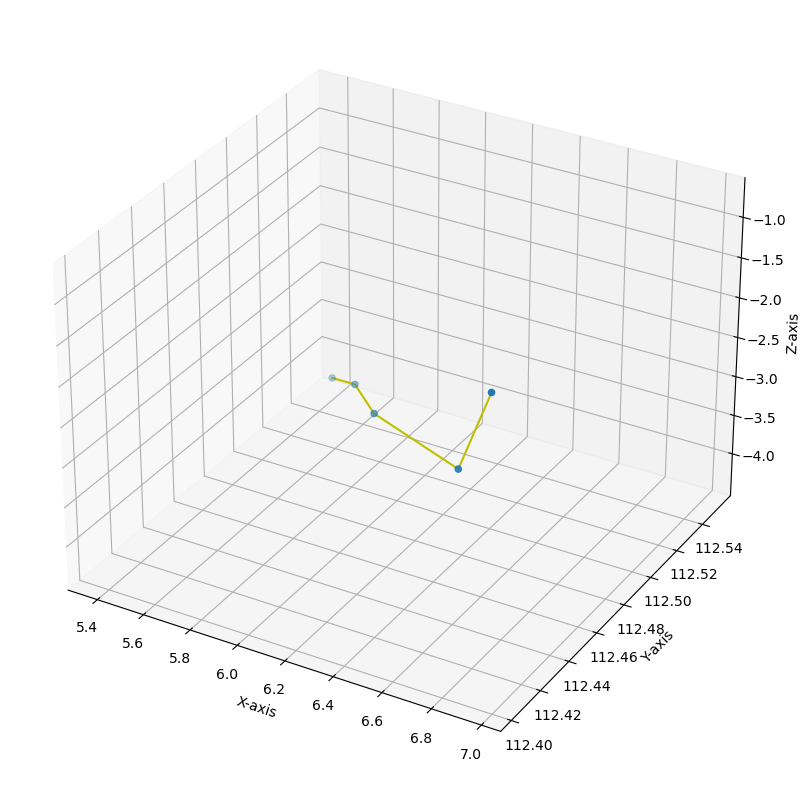

In [63]:


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

sequence_containing_x_vals =  [x[0] for x in trans_values_np]
sequence_containing_y_vals =  [x[1] for x in trans_values_np]
sequence_containing_z_vals =  [x[2] for x in trans_values_np]


ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
ax.plot(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='y')

xLabel = ax.set_xlabel('X-axis', linespacing=3.2)
yLabel = ax.set_ylabel('Y-axis', linespacing=3.1)
zLabel = ax.set_zlabel('Z-axis', linespacing=3.4)
plt.show()

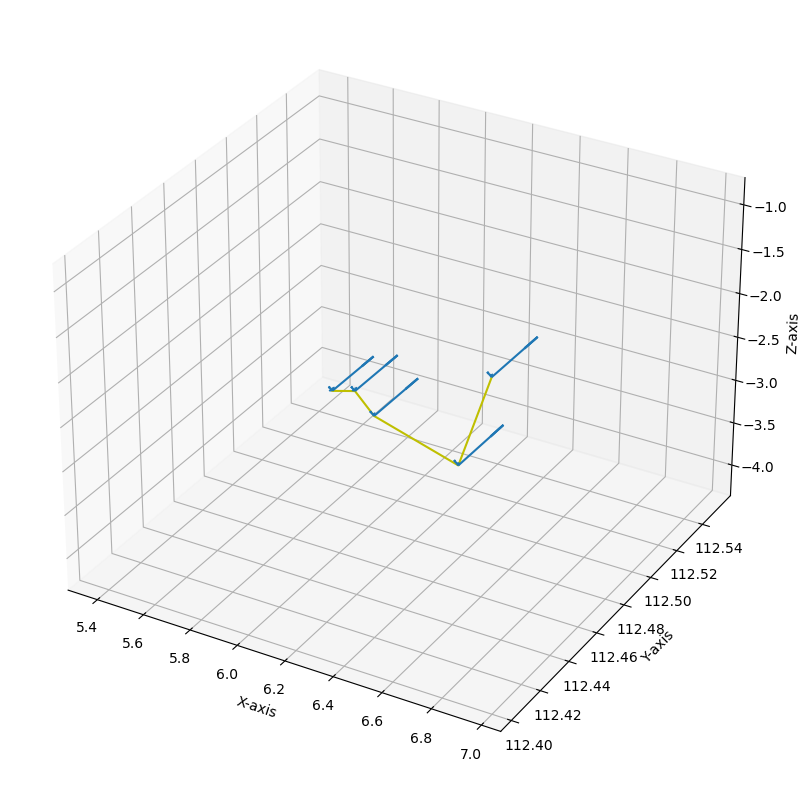

In [72]:
x_x = []
y_x = []
z_x = []

x_y = []
y_y = []
z_y = []

x_z = []
y_z = []
z_z = []

for i in r_values:
#     r = R.from_quat(i)
    r = i
    x_x.append(r[:,0][0])
    y_x.append(r[:,0][1])
    z_x.append(r[:,0][2])
    x_y.append(r[:,1][0])
    y_y.append(r[:,1][1])
    z_y.append(r[:,1][2])
    x_z.append(r[:,2][0])
    y_z.append(r[:,2][1])
    z_z.append(r[:,2][2])

values1 = []
values2 = []
values3 = []

for i,j,k,a,b,c in zip(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, x_x, y_x, z_x):
#     print(i,j,k,a,b,c)
    values1.append([i,j,k,a,b,c])

for i,j,k,a,b,c in zip(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, x_y, y_y, z_y):
    values2.append([i,j,k,a,b,c])

for i,j,k,a,b,c in zip(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, x_z, y_z, z_z):
    values3.append([i,j,k,a,b,c])

soa1 = np.array(values1)
X_x, Y_x, Z_x, U_x, V_x, W_x = zip(*soa1)

soa2 = np.array(values2)
X_y, Y_y, Z_y, U_y, V_y, W_y = zip(*soa2)

soa3 = np.array(values3)
X_z, Y_z, Z_z, U_z, V_z, W_z = zip(*soa3)


# Color by azimuthal angle
c = np.arctan2(U_z, V_z)
# Flatten and normalize
c = (c.ravel() - c.min()) / c.ptp()
# Repeat for each body line and two head lines
c = np.concatenate((c, np.repeat(c, 2)))
# Colormap
c = plt.cm.hsv(c)

fig = plt.figure(figsize=(10, 10))
# ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X_x+X_y+X_z, Y_x+Y_y+Y_z, Z_x+Z_y+Z_z, U_x+U_y+U_z, V_x+V_y+V_z, W_x+W_y+W_z, length=0.03, normalize=True)
# ax.quiver(X_y, Y_y, Z_y, U_y, V_y, W_y, length=0.006, normalize=True, cmap='Reds')
# ax.quiver(X_z, Y_z, Z_z, U_z, V_z, W_z, length=0.006, normalize=True, cmap='Reds')
ax.plot(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='y')

xLabel = ax.set_xlabel('X-axis', linespacing=3.2)
yLabel = ax.set_ylabel('Y-axis', linespacing=3.1)
zLabel = ax.set_zlabel('Z-axis', linespacing=3.4)
plt.show()